# Ecuaciones de Lorenz
Un modelo simple basado en la dinámica de fluidos atmosféricos es representado mediante las ecuaciones de Lorenz, desarrollado por el meteorólogo Estadounidense Edward Lorenz:
\begin{eqnarray}
\frac{dx}{dt}&=&-\sigma x+\sigma y\\
\frac{dy}{dt}&=&rx-y-xz\\
\frac{dz}{dt}&=&-bz+xy
\end{eqnarray}
Lorenz desarrolló estas ecuaciones para representar la intensidad de movimiento de un fluido atmosférico. Donde $x$ representa la intensidad de movimiento convectivo, $y$ representa  la diferencia de temperatura horizontal en una celda de convección. Y $z$ representando lo que se aleja de la linealidad el perfil vertical de temperaturas del gas. Los parámetros $\sigma$, $r$ y $b$ son constantes que dependen de la viscosidad y la difusividad térmica del fluído.

---

Referencias:

- [El atractivo de Lorenz - Cuentos cuánticos](https://cuentos-cuanticos.com/2016/10/03/el-atractivo-de-lorenz/)
- [Número de Prandtl](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Prandtl)
- [Número de Rayleigh](https://es.wikipedia.org/wiki/N%C3%BAmero_de_Rayleigh)

---
Usando $\sigma=10$, $b=\frac{8}{3}$ y $r=28$; condiciones iniciales $x_0=y_0=z_0=5$; encuentre la solución numérica y grafique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,solve_ivp

In [2]:
# Función para odeint
def lorenz(X,t,s,b,r):
  x=X[0] # Intensidad de movimiento convectivo
  y=X[1] # Diferencia de temperatura horizontal
  z=X[2] # Desviación del perfil lineal en la temperatura vertical
  """
  dx/dt=−σx+σy
  dy/dt=rx−y−xz
  dz/dt=−bz+xy
  """
  dX=3*[0]       #np.zeros(3)
  dX[0]=-s*x+s*y
  dX[1]=r*x-y-x*z
  dX[2]=-b*z+x*y
  return np.array(dX)


In [3]:
# Condición inicial
X0=np.array([5,5,5])

# Tiempo
t=np.arange(0,50,0.001)

X=odeint(lorenz,X0,t,args=(10,8/3,28))
X.shape

(50000, 3)

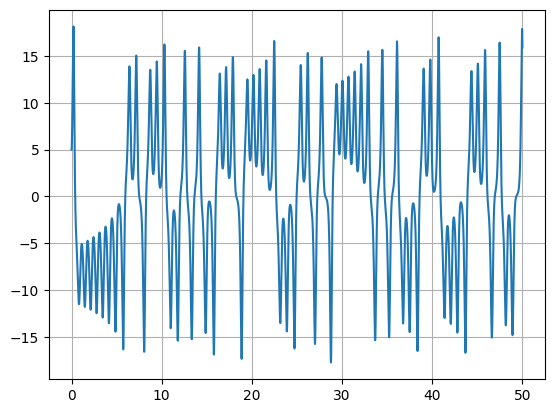

In [4]:
# Gráfica de la intensidad de move
plt.plot(t,X[:,0])
plt.grid()

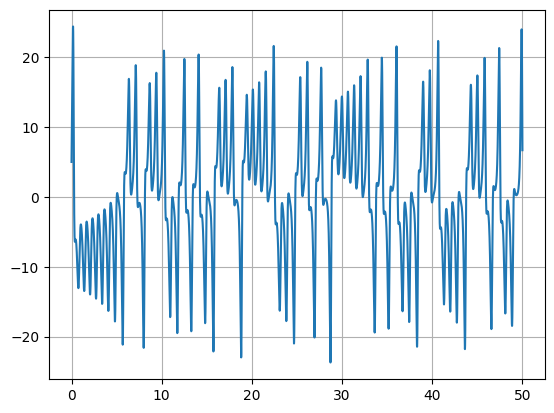

In [5]:
# Gráfica de la temperatura horizontal
plt.plot(t,X[:,1])
plt.grid()

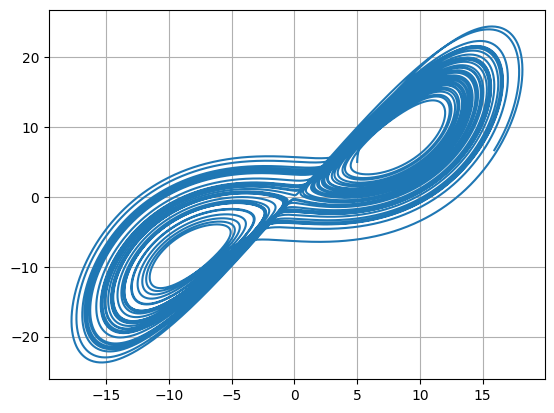

In [6]:
# Gráfica del movimiento convectivo vs temperatura horizontal
plt.plot(X[:,0],X[:,1])
plt.grid()

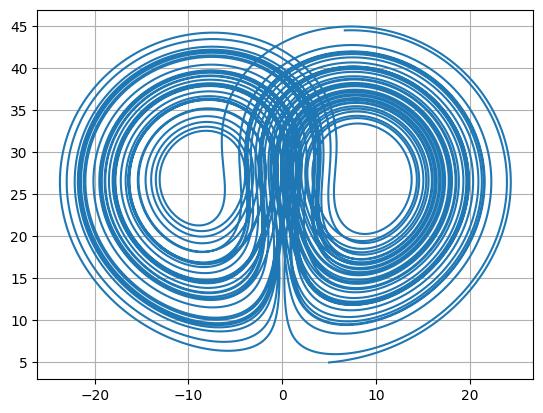

In [7]:
# Gráfica de la temperatura horizontal vs no-linalidad de la temperatura vertical
plt.plot(X[:,1],X[:,2])
plt.grid()

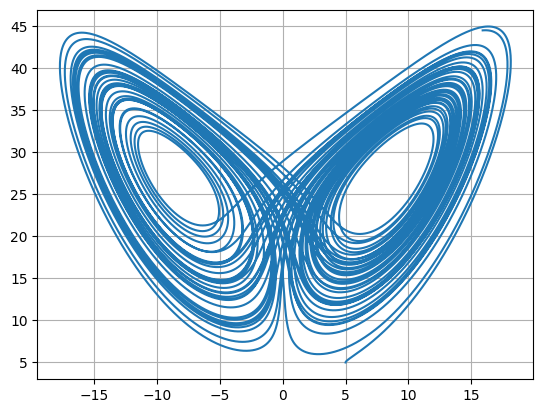

In [8]:
# Gráfica del movimiento convectivo vs no-linalidad de la temperatura vertical
plt.plot(X[:,0],X[:,2])
plt.grid()

Ahora con `solve_ivp`

In [9]:
def lorenz2(t,x,s,b,r):
  return lorenz(x,t,s,b,r)

t_span=(0,50)
sol=solve_ivp(lorenz2,t_span,X0,args=(10,8/3,28),max_step=0.001)

In [10]:
sol.y.shape

(3, 50002)

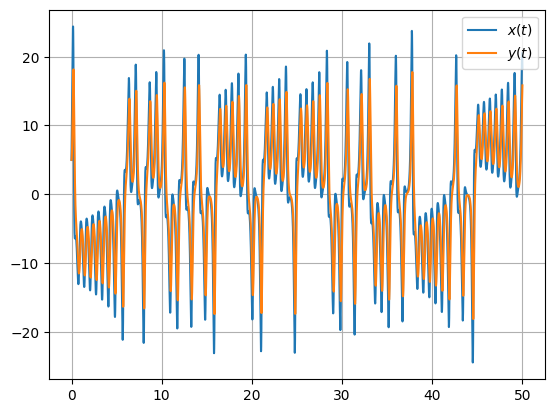

In [19]:
# Gráfica de la intensidad del move y la difrencia de temperatura horizontal
plt.plot(sol.t,sol.y[[1,0],:].T,label=['$x(t)$','$y(t)$'])
plt.legend()
plt.grid()